#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
#import flights table
flights = pd.read_pickle('flights.pkl')
flights.shape

(15927485, 42)

In [4]:
# select 1000 random rows to use for testing 
flights_sample = flights.sample(n=1000)

In [36]:
flights_sample = flights_sample[(flights_sample['dep_delay'].isna() != True)] 
flights_sample = flights_sample[(flights_sample['dep_delay'] < 1000)] 
flights_sample = flights_sample[(flights_sample['diverted']!=1) | (flights_sample['cancelled']!=1)]
flights_sample = flights_sample[(flights_sample['arr_delay'].isna() != True)] 
flights_sample = flights_sample[(flights_sample['air_time'].isna() != True)] 

In [37]:
top_airports = flights.groupby('origin')['fl_date'].count().reset_index(name='count').sort_values(['count'], ascending=False)
top_airports = top_airports.reset_index(drop=True)
top_10_airports = top_airports.head(10)

In [38]:
passengers = pd.read_csv('passengers.csv')

In [66]:
top_passengers = passengers.groupby('origin')['passengers'].sum().reset_index(name='count').sort_values(['count'], ascending=False)
top_passengers = top_passengers.reset_index(drop=True)
top_10_passengers = top_passengers.head(10)
top_10_passengers

,origin,count
0,ATL,257478059
1,LAX,205745255
2,ORD,194019087
3,DFW,163888490
4,DEN,151024252
5,JFK,148927079
6,SFO,133266076
7,LAS,117526251
8,SEA,113960665
9,CLT,112838675


### The airports with the highest numbers of flights do not also share the highest number of passengers.

In [40]:
top = pd.merge(top_airports, top_passengers, on='origin')
top = top.rename(columns={'count_x':'total_flights','count_y':'total_passengers'})
top10 = top.head(10)
top10

,origin,total_flights,total_passengers
0,ORD,790253,194019087
1,ATL,785850,257478059
2,DFW,584688,163888490
3,DEN,552134,151024252
4,CLT,501557,112838675
5,LAX,500840,205745255
6,SEA,379367,113960665
7,SFO,357626,133266076
8,PHX,355485,109444579
9,IAH,354379,103908868


Text(0, 0.5, 'Airport')

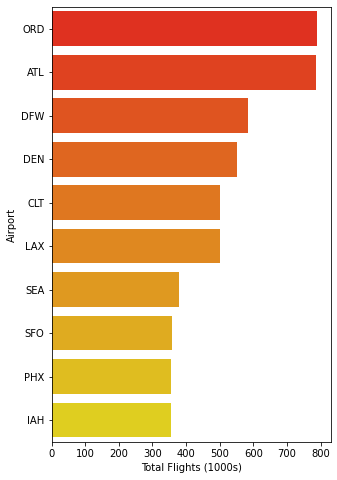

In [65]:
sns.color_palette('autumn')
plt.figure(figsize=(5,8))
ax = sns.barplot(x=top10['total_flights']/1000,y=top10['origin'], palette=("autumn"))
ax.set_xlabel('Total Flights (1000s)')
ax.set_ylabel('Airport')


Text(0, 0.5, 'Airport')

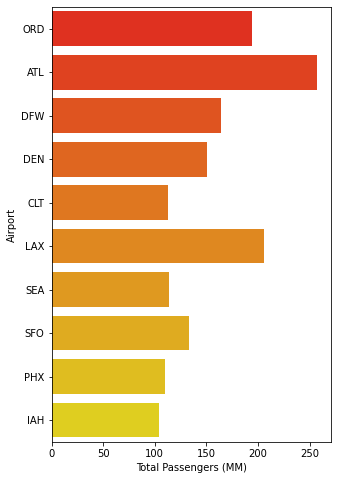

In [58]:
sns.color_palette('autumn')
plt.figure(figsize=(5,8))
ax = sns.barplot(x=top10['total_passengers']/1000000,y=top10['origin'], palette=("autumn"))
ax.set_xlabel('Total Passengers (MM)')
ax.set_ylabel('Airport')

In [41]:
flights_pct = (top_10_airports['count'].sum()/flights['fl_date'].count())*100
pass_pct = (top_10_passengers['count'].sum()/passengers['passengers'].sum())*100
busy_pct = (top10['total_passengers'].sum()/top['total_passengers'].sum())*100

print(f"The Top 10 Airports handle {round(flights_pct,1)}% of all flights and {round(busy_pct,1)}% of all passengers")
print(f"The Top 10 Passenger Airports handle {round(pass_pct,1)}% of all passengers")

The Top 10 Airports handle 32.4% of all flights and 35.5% of all passengers
The Top 10 Passenger Airports handle 32.4% of all passengers


In [42]:
avg_airport_passengers = passengers.groupby('airline_id')['passengers'].mean().reset_index()
avg_carrier_passengers = passengers.groupby('unique_carrier')['passengers'].mean().reset_index()

In [43]:
avg_airport_passengers.to_csv('avg_airport_passengers.csv', index=False)
avg_carrier_passengers.to_csv('avg_carrier_passengers.csv', index=False)

In [69]:
top['passengers_per_flight'] = top['total_passengers']/top['total_flights']

In [76]:
top.sort_values(by=['passengers_per_flight'], inplace=True, ascending=False)

In [77]:
top.head(20)

,origin,total_flights,total_passengers,passengers per flight,passengers_per_flight
375,YNG,2,160579,80289.500000,80289.500000
374,IFP,45,606450,13476.666667,13476.666667
265,GUM,2217,7643029,3447.464592,3447.464592
373,AKN,124,234027,1887.314516,1887.314516
305,SPN,1485,2566115,1728.023569,1728.023569
364,PPG,242,358960,1483.305785,1483.305785
369,DLG,166,172669,1040.174699,1040.174699
368,HYA,172,163920,953.023256,953.023256
25,MIA,177075,105306021,594.697281,594.697281
19,JFK,257214,148927079,579.000673,579.000673
